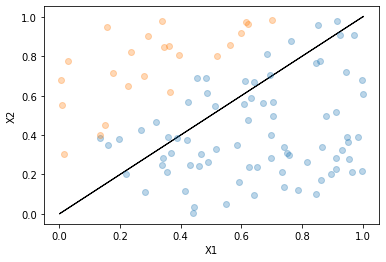

In [281]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(vetor,rotaciona)
    return perp

X, y = geradataset(100)
plotadataset(X, y)
vetor = [1, -1]
hiperplano = perpendicular(vetor)
plt.arrow(*[0,0], *hiperplano)
plt.show()

# Funções de Custo

In [282]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(CustoPerceptron.erro(y, ypred), X)

class HingeLoss():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        marginais = HingeLoss.erro(y, ypred) < 1
        return np.matmul(y[marginais], X[marginais])

class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)


# Perceptron

In [283]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron()):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.014
        self.maxiter = 20
        self.custo = custo
        self.whist = []
        self.chist = []
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.whist.append(self.w)
            self.chist.append(custo)
            if custo==0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
        print(self.w)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

81.87794717186745
493.31019271704383
72.66328649533152
731.98330781187
148.15449175780154
1216.458617372562
440.75208271909537
2210.7384937269444
1273.6830815832118
4298.239928333697
3412.89788597287
8778.626459544379
8646.512355578805
18567.45403296584
21113.276809004725
40239.339483790514
50342.39832758186
88674.20296592015
118200.87209211805
197632.51661491249
[-33.06491336 -18.2582851  -18.24365344]
0.23


In [284]:
whist = np.array(perceptron.whist)
chist = np.array(perceptron.chist)
whist, chist

(array([[ -0.95152196,   0.4709371 ,   0.66750224],
        [  0.3023364 ,   1.31106777,   1.04128732],
        [ -1.12753052,   0.53318722,   0.06766737],
        [  0.73406687,   1.71095816,   0.8004211 ],
        [ -1.45505649,   0.45676082,  -0.51821093],
        [  1.32778383,   2.16566452,   0.72482212],
        [ -2.00450627,   0.21102126,  -1.14331148],
        [  2.17260903,   2.73857601,   0.84466317],
        [ -2.88292234,  -0.25909752,  -1.8762284 ],
        [  3.40242862,   3.51759817,   1.21599118],
        [ -4.25260101,  -1.04368239,  -2.81115077],
        [  5.2187909 ,   4.62931985,   1.93185197],
        [ -6.35921043,  -2.28422408,  -4.08277017],
        [  7.92547809,   6.26005882,   3.13950369],
        [ -9.57425465,  -4.19866535,  -5.88842143],
        [ 11.9807066 ,   8.68736618,   5.06674093],
        [-14.45920072,  -7.11947001,  -8.52122003],
        [ 18.07594678,  12.32738089,   8.06190938],
        [-21.86231791, -11.55130321, -12.41986485],
        [ 27

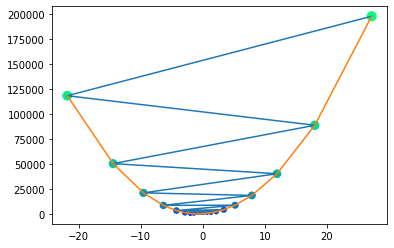

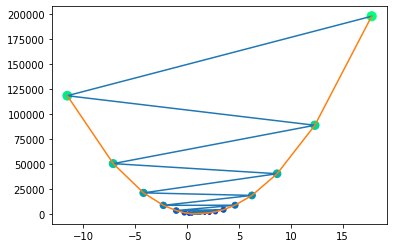

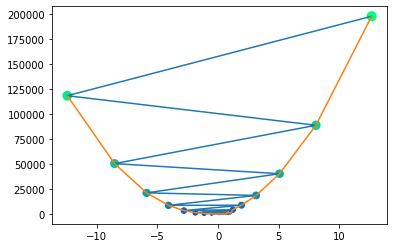

In [285]:
for i in range(whist.shape[1]):
    seq = [i**1.5 for i in range(len(chist))]
    plt.scatter(whist[:,i], chist, s=seq, c=seq, cmap='winter')
    plt.plot(whist[:,i], chist, '-')
    idx = np.argsort(whist[:,i])
    plt.plot(whist[idx,i], chist[idx])
    plt.show()

In [286]:
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

308
92
92
304
92
92
84
112
92
52
60
72
80
76
68
56
52
52
52
52
[ 0.67950489  1.69803667 -1.57247876]
0.87


In [287]:
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

154
46
46
46
154
46
46
46
36
46
76
46
22
40
40
38
40
44
40
34
[ 0.24570452  0.83536164 -0.55553934]
0.85
